In [71]:
import matplotlib.pyplot as plt
import numpy 
import pdb
import math

mi = 0.05
mH = 10.0E3
Eres = mH**2/(2*mi)
hbarc = 197 * 1E6 * 1E-15 *100 # eV-cm
R = 150E6*1E3*100 # earth-sun distance in cm

# http://pdg.lbl.gov/2008/reviews/rpp2008-rev-solar-neutrinos.pdf
phi_pp = 5.99E10 # 1/cm^2.sec +/1%
phi_Be7 = 4.84E9 # 1/cm^2.sec +/10%
Enupp = 0.3E6 # very close to mean of pp flux . Use this rather than properly integrating over dE.
EnuBe7 = 0.86E6

In [72]:
def eqn9(g,E):
    Im = g**4*E/(4*mi**2) * ( Eres/((E-Eres)**2 + (0.5*Eres*g**2)**2) + Eres/((E+Eres)*2 + (0.5*Eres*g**2)**2) )
    xsec = 4*math.pi * Im * hbarc**2
    return xsec  # cm^2

In [93]:
x=eqn9(1E-5,0.8E6)
print x

n=1.0E10*300 
g=0.000001
# rate of reactions in whole sphere centered on sun out to earth = \Int dr {xsec * N_targets * flux(r)} 
r = n*4*math.pi*R**3 * (0.86*eqn14(g,Enupp)*phi_pp  +  0.14*eqn14(g,EnuBe7)*phi_Be7) # 1/sec
# The rate that is eaten up that would otherwise get to earth is r * 4pi r_e^2 / 4piR^2
# So, the net flux eaten up at earth by our CNB is r/(4pi r_e^2) = r/4piR^2
phi_miss = r/(4*math.pi*R**2)

print phi_miss
# We need phi_miss to be not more than 1.1% of phi_pp+phi_Be7


1.94919375759e-21
1.75916725575e+11


In [116]:
ny = numpy.logspace(8, 11, 50)
gx = numpy.logspace(-8,0,50)
phi_eaten = numpy.empty((gx.size,ny.size))
#pdb.set_trace()
for i in range(gx.size):   
    for j in range(ny.size):
        phi_eaten[i,j] = ny[j]*300*4*math.pi*R**3 * (0.86*eqn9(gx[i],Enupp)*phi_pp  +  0.14*eqn9(gx[i],EnuBe7)*phi_Be7) / (4*math.pi*R**2)
        #pdb.set_trace()
        #print  str(i) + " " + str(j) + " " +str(phi_eaten[i,j])

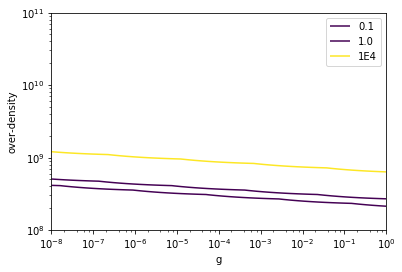

In [123]:
gridX, gridY = numpy.meshgrid(gx, ny)
Cols = ['DarkRed','DarkBlue']
CS = plt.contour(gridX,gridY,phi_eaten/(0.011*(phi_pp+phi_Be7)),levels=(0.1,1.0,1E4))
plt.loglog()
plt.xlabel('g')
plt.ylabel('over-density')
labels = ['0.1', '1.0','1E4']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
plt.legend(loc='upper right')
plt.show()
plt.savefig('solar-constraint.png')
plt.close()